### OpenCV - Excercise #1

### By Joo Soo Jeong / Ph.D

### https://github.com/JSJeong-me/KOSA-Vision

### email: heinem@naver.com

###  Copyrights 2021

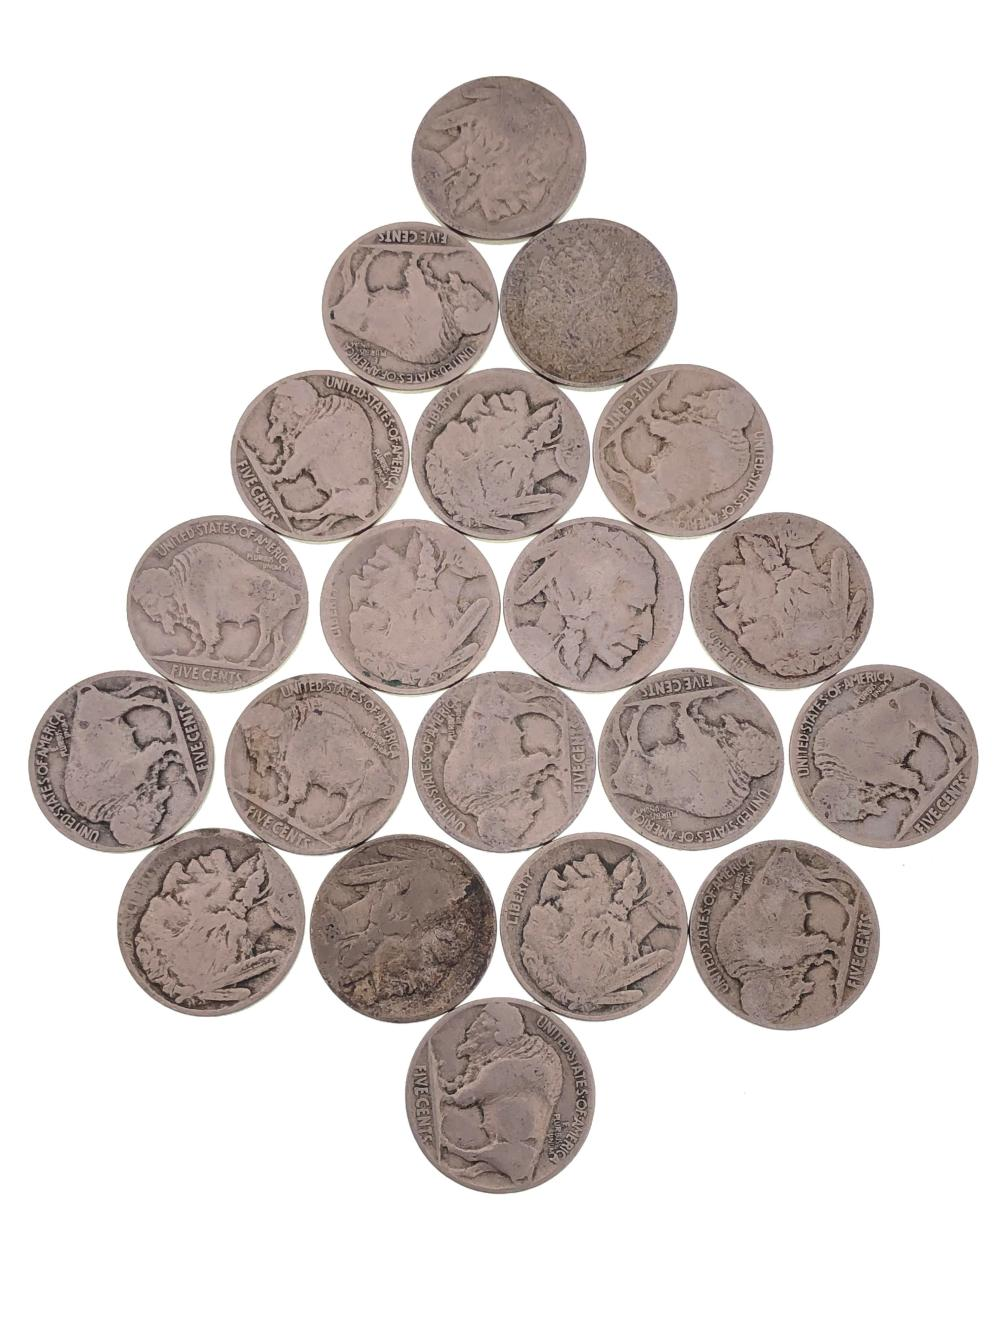

# AZ antivirus bottles counts

# Step 1 - Find red RGB codes

low [0, 0, 220]
high [255, 255, 255]

In [1]:
import cv2
import numpy as np
import sys

src = cv2.imread('.\\..\\images\\coins-20.jpg')

if src is None:
    print('image load failed')
    sys.exit()


rgb_src = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

low = np.array([0, 0, 220])
high = np.array([255, 255, 255])
mask = cv2.inRange(rgb_src, low, high)
#result = cv2.bitwise_and(src, src, mask=mask)

blur = cv2.medianBlur(mask,15)

# Distance transfrom
dist_transform = cv2.distanceTransform(blur,cv2.DIST_L2,3)
ret, isolate_image =  cv2.threshold(dist_transform, 0.5*dist_transform.max(),255,0)

last_image = np.uint8(isolate_image)

# the counting of objects and recording the positions of the objects
cnts, _ = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print('Contour : {0}'.format(len(cnts)))

for (i, c) in enumerate(cnts):
    ((x, y), _) = cv2.minEnclosingCircle(c)
    cv2.drawContours(src, [c], -1, (0, 255, 0), 5)
    cv2.putText(src, "{}".format(i + 1), (int(x)-55, int(y)+50), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3)

cv2.imshow('Anti-virus', src)
cv2.imshow('Distance Transform Iamge', dist_transform)
cv2.imshow('Isolated Iamge', isolate_image)


cv2.waitKey(0)
cv2.destroyAllWindows()

Contour : 4


# Draw circles
for (i, c) in enumerate(cnts):
    ((x, y), _) = cv2.minEnclosingCircle(c)
    cv2.drawContours(rgb_src, [c], -1, (0, 255, 0), 5)
    cv2.putText(rgb_src, "{}".format(i + 1), (int(x)-55, int(y)+50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3)

In [5]:
# Step 1 - Find red RGB codes

#### low [111, 29, 18]
#### high [200, 50, 50]

In [2]:
import cv2
import numpy as np
import sys

src = cv2.imread('.\\..\\images\\coins-20.jpg')

if src is None:
    print('image load failed')
    sys.exit()


hsv_src = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
hsv_src = cv2.resize(hsv_src, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Google vision api  RGB(161, 32, 30)   RGB(174, 29, 18)  RGB(204, 38, 32)
low = np.array([0, 0, 208])
high = np.array([255, 255, 255])
mask = cv2.inRange(hsv_src, low, high)
result = cv2.bitwise_and(hsv_src, hsv_src, mask=mask)


cv2.imshow('Anti-virus', hsv_src)
cv2.imshow('Masking Image', mask)
cv2.imshow('Substracted Image', result)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#Step 2

In [1]:
import cv2
import numpy as np
import sys

src = cv2.imread('.\\..\\images\\coins-20.jpg')

if src is None:
    print('image load failed')
    sys.exit()


hsv_src = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
hsv_src = cv2.resize(hsv_src, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Google vision api  RGB(161, 32, 30)   RGB(174, 29, 18)  RGB(204, 38, 32)
low = np.array([0, 0, 208])
high = np.array([255, 255, 255])
mask = cv2.inRange(hsv_src, low, high)

image_res ,image_thresh = cv2.threshold(mask, 0, 255,cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)

#result = cv2.bitwise_and(src, src, mask=mask)


cv2.imshow('Anti-virus0', hsv_src)
cv2.imshow('Masking Image', mask)
cv2.imshow('Threshhold', image_thresh)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Step 3 Blur

In [2]:
import cv2
import numpy as np
import sys

src = cv2.imread('.\\..\\images\\coins-20.jpg')

if src is None:
    print('image load failed')
    sys.exit()


hsv_src = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
hsv_src = cv2.resize(hsv_src, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Google vision api  RGB(161, 32, 30)   RGB(174, 29, 18)  RGB(204, 38, 32)
low = np.array([0, 0, 208])
high = np.array([255, 255, 255])
mask = cv2.inRange(hsv_src, low, high)

image_res ,image_thresh = cv2.threshold(mask, 0, 255,cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)

blur = cv2.medianBlur(image_thresh, 3) # 25 -> 17

#result = cv2.bitwise_and(src, src, mask=mask)


cv2.imshow('Anti-virus0', src)
cv2.imshow('Masking Image', mask)
cv2.imshow('Blurred Image', blur)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Step 4 noise deduction

In [2]:
import cv2
import numpy as np
import sys

src = cv2.imread('.\\..\\images\\coins-20.jpg')

if src is None:
    print('image load failed')
    sys.exit()

hsv_src = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
hsv_src = cv2.resize(hsv_src, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Google vision api  RGB(161, 32, 30)   RGB(174, 29, 18)  RGB(204, 38, 32)
low = np.array([0, 0, 208])
high = np.array([255, 255, 255])
mask = cv2.inRange(hsv_src, low, high)

image_res ,image_thresh = cv2.threshold(mask, 0, 255,cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)

blur = cv2.medianBlur(image_thresh, 3) # 25 -> 17

kernel = np.ones((3,3),np.uint8)
# with the morphologyEx method is that although we blur the picture, some small black or white areas (noise) may remain. We used this method to destroy these.
shaved = cv2.morphologyEx(blur,cv2.MORPH_OPEN,kernel)


cv2.imshow('Anti-virus0', src)
#cv2.imshow('Anti-virus1', mask)
cv2.imshow('Blurred Image', blur)
cv2.imshow('Shaved Image', shaved)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Step 5 Distance transform

In [1]:
import cv2
import numpy as np
import sys

src = cv2.imread('.\\..\\images\\coins-20.jpg')

if src is None:
    print('image load failed')
    sys.exit()


hsv_src = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
hsv_src = cv2.resize(hsv_src, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Google vision api  RGB(161, 32, 30)   RGB(174, 29, 18)  RGB(204, 38, 32)
low = np.array([0, 0, 208])
high = np.array([255, 255, 255])
mask = cv2.inRange(hsv_src, low, high)

image_res ,image_thresh = cv2.threshold(mask, 0, 255,cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)

blur = cv2.medianBlur(image_thresh, 3) # 25 -> 17

kernel = np.ones((3,3),np.uint8)
# with the morphologyEx method is that although we blur the picture, some small black or white areas (noise) may remain. We used this method to destroy these.
shaved = cv2.morphologyEx(blur,cv2.MORPH_OPEN,kernel)

# Distance transfrom
dist_transform = cv2.distanceTransform(shaved,cv2.DIST_L2,3)
ret, isolate_image =  cv2.threshold(dist_transform, 0.5*dist_transform.max(),255,0)

cv2.imshow('Anti-virus0', src)
#cv2.imshow('Anti-virus1', mask)
#cv2.imshow('Anti-virus2', blur)
cv2.imshow('Anti-virus3', shaved)
cv2.imshow('Anti-virus4', dist_transform)
cv2.imshow('Anti-virus5', isolate_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# Step 6 Contour & counts of number of caps

In [2]:
import cv2
import numpy as np
import sys
import imutils

src = cv2.imread('.\\..\\images\\coins-20.jpg')

if src is None:
    print('image load failed')
    sys.exit()


hsv_src = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
hsv_src = cv2.resize(hsv_src, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Google vision api  RGB(161, 32, 30)   RGB(174, 29, 18)  RGB(204, 38, 32)
low = np.array([0, 0, 208])
high = np.array([255, 255, 255])
mask = cv2.inRange(hsv_src, low, high)

image_res ,image_thresh = cv2.threshold(mask, 0, 255,cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)

blur = cv2.medianBlur(image_thresh, 3) # 25 -> 17

kernel = np.ones((3,3),np.uint8)
# with the morphologyEx method is that although we blur the picture, some small black or white areas (noise) may remain. We used this method to destroy these.
shaved = cv2.morphologyEx(blur,cv2.MORPH_OPEN,kernel)

# Distance transfrom
dist_transform = cv2.distanceTransform(shaved,cv2.DIST_L2,3)
ret, isolate_image =  cv2.threshold(dist_transform, 0.5*dist_transform.max(),255,0)

# Contours
last_image = np.uint8(isolate_image)    

# the counting of objects and recording the positions of the objects
cnts = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print(len(cnts))


cv2.imshow('Anti-virus0', src)
#cv2.imshow('Anti-virus1', mask)
#cv2.imshow('Anti-virus2', blur)
#cv2.imshow('Anti-virus3', shaved)
cv2.imshow('Anti-virus4', dist_transform)
cv2.imshow('Anti-virus5', isolate_image)
cv2.imshow('Anti-virus6', last_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

20


In [ ]:
# Step 7 Draw circles

In [1]:
import cv2
import numpy as np
import sys
import imutils

src = cv2.imread('.\\..\\images\\coins-20.jpg')

if src is None:
    print('image load failed')
    sys.exit()


hsv_src = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
hsv_src = cv2.resize(hsv_src, dsize=(0, 0), fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

# Google vision api  RGB(161, 32, 30)   RGB(174, 29, 18)  RGB(204, 38, 32)
low = np.array([0, 0, 208])
high = np.array([255, 255, 255])
mask = cv2.inRange(hsv_src, low, high)

image_res ,image_thresh = cv2.threshold(mask, 0, 255,cv2.THRESH_BINARY_INV, cv2.THRESH_OTSU)

blur = cv2.medianBlur(image_thresh, 3) # 25 -> 17

kernel = np.ones((3,3),np.uint8)
# with the morphologyEx method is that although we blur the picture, some small black or white areas (noise) may remain. We used this method to destroy these.
shaved = cv2.morphologyEx(blur,cv2.MORPH_OPEN,kernel)

# Distance transfrom
dist_transform = cv2.distanceTransform(shaved,cv2.DIST_L2,3)
ret, isolate_image =  cv2.threshold(dist_transform, 0.5*dist_transform.max(),255,0)

# Contours
last_image = np.uint8(isolate_image)    

# the counting of objects and recording the positions of the objects
cnts = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print(len(cnts))

# Draw circles
for pts in cnts:
    perimeter = cv2.arcLength(pts, True)
    cv2.drawContours(hsv_src, [pts], 0, (255, 0, 0), 5)
    approx = cv2.approxPolyDP(pts, cv2.arcLength(pts, True), True)


cv2.imshow('Anti-virus0', hsv_src)
#cv2.imshow('Anti-virus1', mask)
#cv2.imshow('Anti-virus2', blur)
#cv2.imshow('Anti-virus3', shaved)
#cv2.imshow('Anti-virus4', dist_transform)
#cv2.imshow('Anti-virus5', isolate_image)
cv2.imshow('Anti-virus6', last_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

20


In [4]:
import cv2
import numpy as np
import sys
import imutils


src = cv2.imread('.\\images\\antivirus.jpg')

if src is None:
    print('image load failed')
    sys.exit()

rgb_src = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)

# Every color except white & Green
low = np.array([111, 0, 0])
high = np.array([204, 55, 55])
mask = cv2.inRange(rgb_src, low, high)

blur = cv2.medianBlur(mask,15) # 25 -> 17

#kernel = np.ones((3,3),np.uint8)
# with the morphologyEx method is that although we blur the picture, some small black or white areas (noise) may remain. We used this method to destroy these.
#shaved = cv2.morphologyEx(blur,cv2.MORPH_OPEN,kernel)

# Distance transfrom
dist_transform = cv2.distanceTransform(blur,cv2.DIST_L2,3)
ret, isolate_image =  cv2.threshold(dist_transform, 0.5*dist_transform.max(),255,0)


# Contours
last_image = np.uint8(isolate_image)    

# the counting of objects and recording the positions of the objects
cnts, _ = cv2.findContours(last_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#cnts = imutils.grab_contours(cnts)
print(len(cnts))

# Draw circles
for (i, c) in enumerate(cnts):
    ((x, y), _) = cv2.minEnclosingCircle(c)
    cv2.drawContours(rgb_src, [c], -1, (0, 255, 0), 5)
    cv2.putText(rgb_src, "{}".format(i + 1), (int(x)-55, int(y)+50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3)


cv2.imshow('Antivirus0', src)
cv2.imshow('Antivirus1', rgb_src)
#cv2.imshow('Anti-virus2', blur)
#cv2.imshow('Anti-virus3', shaved)
#cv2.imshow('Anti-virus4', dist_transform)
#cv2.imshow('Anti-virus5', isolate_image)
cv2.imshow('Antivirus6', last_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


9
